
# Project: Investigating TMDB movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction to Data</a>
</li>
<br>
<li><a href="#wrangling">Data Wrangling</a>
</li>
<br>
<li><a href="#clean">Clean dataset</a></li>
<br>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<br>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction to Data

TMDB movie dataset is metadata on 5000 Movies from TMDB. The dataset has information about different movies such as movie title, movie genre, budget of the movie, revenue of the movie, popularity score etc. 

In the analysis of the TMDB movie dataset, the following questions are addressed - 

>a. Among the two most common genres, which one is more popular ?

>b. What are the key factors affecting popularity based on linear regression ? 

<a id='import'></a>
>### Import Packages
In this step, the packages which are required for analysis and plotting graphs are imported.

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import ttest_ind 
from scipy.stats import ttest_ind_from_stats
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
In this step, the data is loaded in a dataframe, the datatypes of the variables are checked, and then dataset is trimmed and cleaned for analysis.

><a id='load'></a>
>### Load Dataset
>In this step, the dataset is loaded into a dataframe and the first 5 lines from the dataframe are printed.

In [5]:
#Load the Data from csv into a data frame
DIR = "D:\\Udacity\\Intro to Data Analysis\\Project 2";
os.chdir(DIR)

tmdb_movies = pd.read_csv("tmdb-movies.csv")

In [6]:
#Printing first 5 lines from the dataframe
print(tmdb_movies.shape)
tmdb_movies.head()

(10866, 21)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


<a id='dtypes'></a>
>### Inspect and fix Datatypes
In this step, the datatypes of the variables in the dataframe are inspected.

In [7]:
#Inspect data types 
tmdb_movies.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

>>### Observation
In the above results, there are many variables which are stored as object rather than string. These variables can be directly used as string and string operations can be performed on them. The reason for it is instead of saving bytes of string directly, Pandas use object ndarray to save the pointers to objects as the length of the string variables is not fixed. Since the variables can be used as string even if they are of type object, no conversion is performed. 

<a id='missing'></a>
>### Retriving Dataframe information
In this step, the information of the dataframe is retrieved for its different columns to identify if there are any records with null/missing values. 

In [8]:
tmdb_movies.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>>### Observation
From the above information, we can see that Homepage has more than 50% missing values i.e. out of 10866 records only 2936 records have values for Homepage. There are missing values present for the other variables like - imdb_id, cast, director, tagline, keywords, overview, genres and production companies. 
<p>
Since the focus of the data analysis will be on the variables - genres, popularity, revenue, budget,vote_count, vote_average, and runtime, only these variables will be inspected to see if there is any data missing for these variables or if there are any outliers which will impact the analysis results.

<a id='clean'></a>
## Data Cleaning 

>### Remove duplicate id's
To make sure that all the records in the dataframe are unique, the dataframe is checked to see if any duplicate ids are present and then those duplicate ids are removed. 

In [9]:
#Find duplicate ids
revised_I_tmdb_movies = tmdb_movies;
revised_I_tmdb_movies[revised_I_tmdb_movies.duplicated(['id'])]

 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/2010,110,5.0,2010,30000000.0,967000.0


In [10]:
#drop duplicates
revised_I_tmdb_movies = revised_I_tmdb_movies.drop_duplicates(['id'])
revised_I_tmdb_movies[revised_I_tmdb_movies.duplicated(['id'])]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


>### Concise summary of Dataframe
After removing the duplicates, we will again take a look at the summary of the dataframe for further analysis

In [11]:
revised_II_tmdb_movies = revised_I_tmdb_movies
revised_II_tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

> ### Remove missing genre values
<br> 
From the above information, we can see that genre has some missing/null data.<br>
To make sure, the results are not affected by these missing/null values present for genres column, the missing values are removed from genres.

In [12]:
revised_II_tmdb_movies = revised_II_tmdb_movies.loc[~(revised_II_tmdb_movies.genres.isnull())]

>### Remove outliers for popularity
Further, in order to have a good fit for the popularity of the movie, the outliers are removed to have a near-normal distribution of the dependent variable. Inter-quartile technique for outlier removal where datapoints above IQR + 1.5 * Q3 and the datapoints below IQR - 1.5 Q1 are removed is used.

In [13]:
def maximum_bound(field):
    return (field.quantile(0.75) - field.quantile(0.25)) + \
                (1.5 * field.quantile(0.75))

def minimum_bound(field):
    return (field.quantile(0.75) - field.quantile(0.25)) - \
                (1.5  * field.quantile(0.25))


final_movie_df = revised_II_tmdb_movies[(revised_II_tmdb_movies['popularity'] > minimum_bound(revised_II_tmdb_movies['popularity'])) \
                & (revised_II_tmdb_movies['popularity'] < maximum_bound(revised_II_tmdb_movies['popularity']))]

>### Remove missing values for revenue
The descriptive statistics for revenue is calculated first as below.

In [14]:
final_movie_df['revenue'].describe()

count    7.516000e+03
mean     2.628291e+07
std      6.255645e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.460999e+07
max      1.123747e+09
Name: revenue, dtype: float64

>>### Observation
From the descriptive statistics, we can see that the minimum value is 0 for revenue. This value is treated as missing value and all the records with values revenue = 0 are dropped. 

In [15]:
final_movie_df = final_movie_df[final_movie_df.revenue != 0]

>### Remove missing values for budget 
The descriptive statistics for budget is calculated as below - 

In [16]:
final_movie_df['budget'].describe()

count    3.661000e+03
mean     2.273750e+07
std      2.912046e+07
min      0.000000e+00
25%      1.000000e+06
50%      1.380000e+07
75%      3.200000e+07
max      4.250000e+08
Name: budget, dtype: float64

>>### Observation
From the descriptive statistics, we can see that the minimum value is 0 for budget. This value is treated as missing value and all the records with values budget = 0 are dropped. 

In [17]:
final_movie_df = final_movie_df[final_movie_df.budget != 0]

>### Remove missing values for vote_count 
The descriptive statistics for vote count is given as below - 

In [18]:
final_movie_df['vote_count'].describe()

count    2853.000000
mean      251.453207
std       308.209705
min        10.000000
25%        64.000000
50%       154.000000
75%       324.000000
max      4368.000000
Name: vote_count, dtype: float64

>> ### Observation 
There are no missing values observed for vote_count. Hence no operation is performed on vote_count

>### Remove missing values for vote_average
The descriptive statistics for vote_average is given as below -  

In [19]:
final_movie_df['vote_average'].describe()

count    2853.000000
mean        6.058009
std         0.747917
min         3.300000
25%         5.600000
50%         6.100000
75%         6.600000
max         8.400000
Name: vote_average, dtype: float64

>> ### Observation 
There are no missing values observed for vote_average. Hence no operation is performed on vote_average

>### Remove missing values for runtime 
The descriptive statistics for runtime is given as below - 

In [20]:
final_movie_df['runtime'].describe()

count    2853.000000
mean      107.708728
std        19.200965
min        15.000000
25%        95.000000
50%       104.000000
75%       117.000000
max       338.000000
Name: runtime, dtype: float64

>> ### Observation 
There are no missing values observed for runtime. Hence no operation is performed on runtime

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 - Comparing the popularity of two most common genres

For the research question, first it is determined how many movies in percentage are present for each genre and then the popularity is compared for the two most common genres. 

>### Distribution of Movies across each genre
A piechart is plotted to visualize the distribution of movies as per their genres.

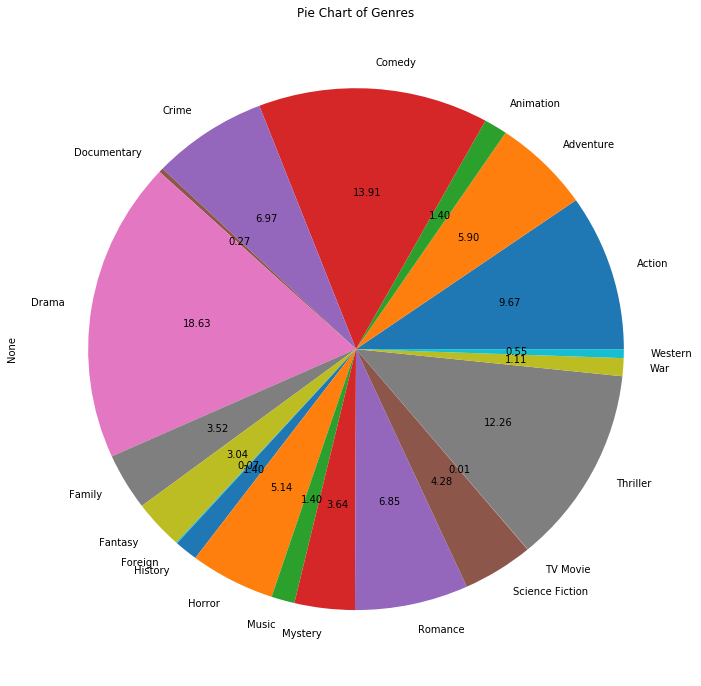

In [21]:
genre_df = pd.DataFrame(columns = ['popularity', 'vote_count', 'genre'])


def SubsetForGenre(original_dataframe):
    global genre_df
    genres = np.array(original_dataframe['genres'].split('|'))
    duplicate_entries = {}
    length = genres.size
    duplicate_entries['genre'] = []
    duplicate_entries['popularity'] = [original_dataframe['popularity']] * length
    duplicate_entries['vote_count'] = [original_dataframe['vote_count']] * length
    for each_genre in genres:
        duplicate_entries['genre'].append(each_genre)
    genre_df = genre_df.append(pd.DataFrame(duplicate_entries), ignore_index=True)
    
final_movie_df.apply(SubsetForGenre, axis = 1)
genre_df = genre_df[['popularity','vote_count','genre']]

a = genre_df.groupby('genre').size()

a.plot.pie(figsize=(12,12), title = "Pie Chart of Genres", autopct='%.2f')


>### Comparison of two genres by popularity
From the above pie chart it is clear that Comedy and Drama genres are two most common genres.

><p> Next, to begin with the comparison of the two genres, we will start with descriptive statistics of genres for informational purposes and will generate box plot for genres comedy and Drama.

In [22]:
genre_popularity = genre_df.groupby('genre')['popularity'].describe().reset_index()
print(genre_popularity)

              genre   count      mean       std       min       25%       50%  \
0            Action   723.0  0.786603  0.370741  0.195283  0.469122  0.751250   
1         Adventure   441.0  0.812444  0.366297  0.203260  0.509129  0.774737   
2         Animation   105.0  0.876178  0.365511  0.196581  0.565312  0.865105   
3            Comedy  1040.0  0.741072  0.355850  0.195048  0.444555  0.681032   
4             Crime   521.0  0.760553  0.353987  0.198863  0.470629  0.719299   
5       Documentary    20.0  0.438986  0.249108  0.203044  0.261268  0.348831   
6             Drama  1393.0  0.699875  0.341849  0.195283  0.426977  0.630893   
7            Family   263.0  0.798834  0.371366  0.198611  0.494591  0.748763   
8           Fantasy   227.0  0.858748  0.369569  0.196581  0.555840  0.884844   
9           Foreign     5.0  0.290458  0.076072  0.215030  0.216503  0.294331   
10          History   105.0  0.713677  0.322215  0.206880  0.469518  0.661609   
11           Horror   384.0 

>### Box plot for Comdey and Drama genres based on the popularity

popularity    Axes(0.1,0.15;0.8x0.75)
dtype: object

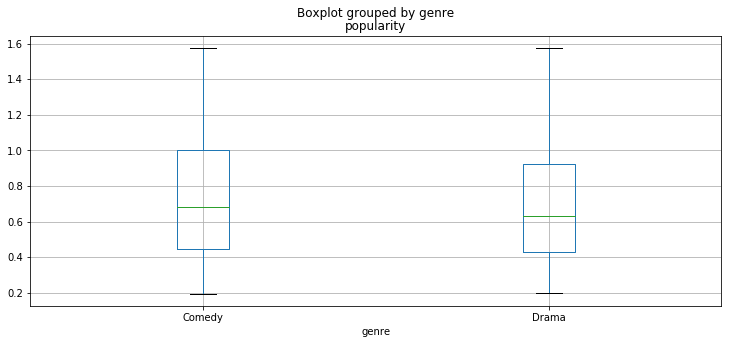

In [23]:
fig, axes = plt.subplots(ncols=1, figsize=(12, 5), sharey=True)
genre_df.query("genre in ['Comedy','Drama']").boxplot(column = 'popularity', by='genre', return_type='axes', ax=axes)

>### Observation
From the descriptive statistics and box plots, we do not see much difference in the mean and standard deviations for data for movies in Comedy genre and Drama genre. We can also see that count of the records is high for each dataset, as a result we will have low standard error(SE = standard deviation/sqrt(n)) for the dataset. 

><br>Now, we will do upper-tailed t-test to compare the popularity of the means of movies with genre drama and movies with genre comedy.
Let, mean of popularity of drama movies : mu_d
and mean of popularity of comedy movies : mu_c
<br>
The null and alternative hypothesis are as follows - 
<br>
Ho :mu_c - mu_d <= 0
<br>
Ha :mu_c - mu_d > 0

>### t-test for means of movies from comedy and drama genre

In [24]:
comedy_data = genre_df[genre_df['genre']=='Comedy']
drama_data = genre_df[genre_df['genre']=='Drama']

#ttest_ind(comedy_data['popularity'], drama_data['popularity'])

ttest_ind_from_stats(comedy_data['popularity'].mean(), comedy_data['popularity'].std(), \
                     comedy_data['popularity'].count(), drama_data['popularity'].mean(), \
                     drama_data['popularity'].std(), drama_data['popularity'].count(), equal_var=True)

Ttest_indResult(statistic=2.8895259064343537, pvalue=0.0038924007915736602)

>### Observation
The p value is 0.003/2 = 0.0015 for one-tailed test. Since the pvalue < 0.01, we can say that the null hypothesis will be rejected for level of significance of 0.01. Hence we can say that our hypthoseis - mu_c - mu_d <= 0 will be rejected i.e. we can say that movies with genre 'drama' are not more popular than movies with genre 'comedy'. 

### Research Question 2  - What factors contribute to the popularity of a movie?

In this section, linear regression is used to determine which factors contribute to the popularity of a movie.Popularity is constructed as an dependent variable. The independent variables for the movie popularity are budget, revenue, vote count, vote average and runtime. A histogram is plotted to observe the distribution of popularity data.

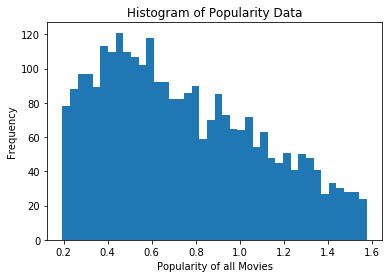

In [28]:
plt.hist(final_movie_df['popularity'],bins = 40)
plt.title('Histogram of Popularity Data')
plt.xlabel('Popularity of all Movies')
plt.ylabel('Frequency')
plt.show()

>### Observation
From the histogram for popularity of movies, we can say that there are no outliers for popularity

In [26]:
movie_popularity = ols("popularity ~ budget + revenue + vote_count + vote_average + runtime", data=final_movie_df).fit()
movie_popularity.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     265.4
Date:                Mon, 20 Nov 2017   Prob (F-statistic):          2.08e-233
Time:                        11:18:50   Log-Likelihood:                -556.29
No. Observations:                2853   AIC:                             1125.
Df Residuals:                    2847   BIC:                             1160.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4133      0.050      8.223      0.000       0.315       0.512
budget        1.173e-09   2.34e-10      5.008      0.000    7.14e-10    1.63e-09
revenue       3.588e-10   8.71e-11      4.121      0.000    1.88e-10     5.3e-10
vote_count       0.0005   2.38e-05     21.287      0.000       0.000       0.001
vote_average     0.0399      0.008      4.747      0.000       0.023       0.056
runtime         -0.0009      0.000     -2.851      0.004      -0.002      -0.000
==============================================================================
Omnibus:                      345.511   Durbin-Watson:                   0.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2295.008
Skew:                          -0.365   Prob(JB):                         0.00
Kurtosis:                       7.333   Cond. No.                     1.04e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

>### Plot the scatter plots for independent variable and dependent variables

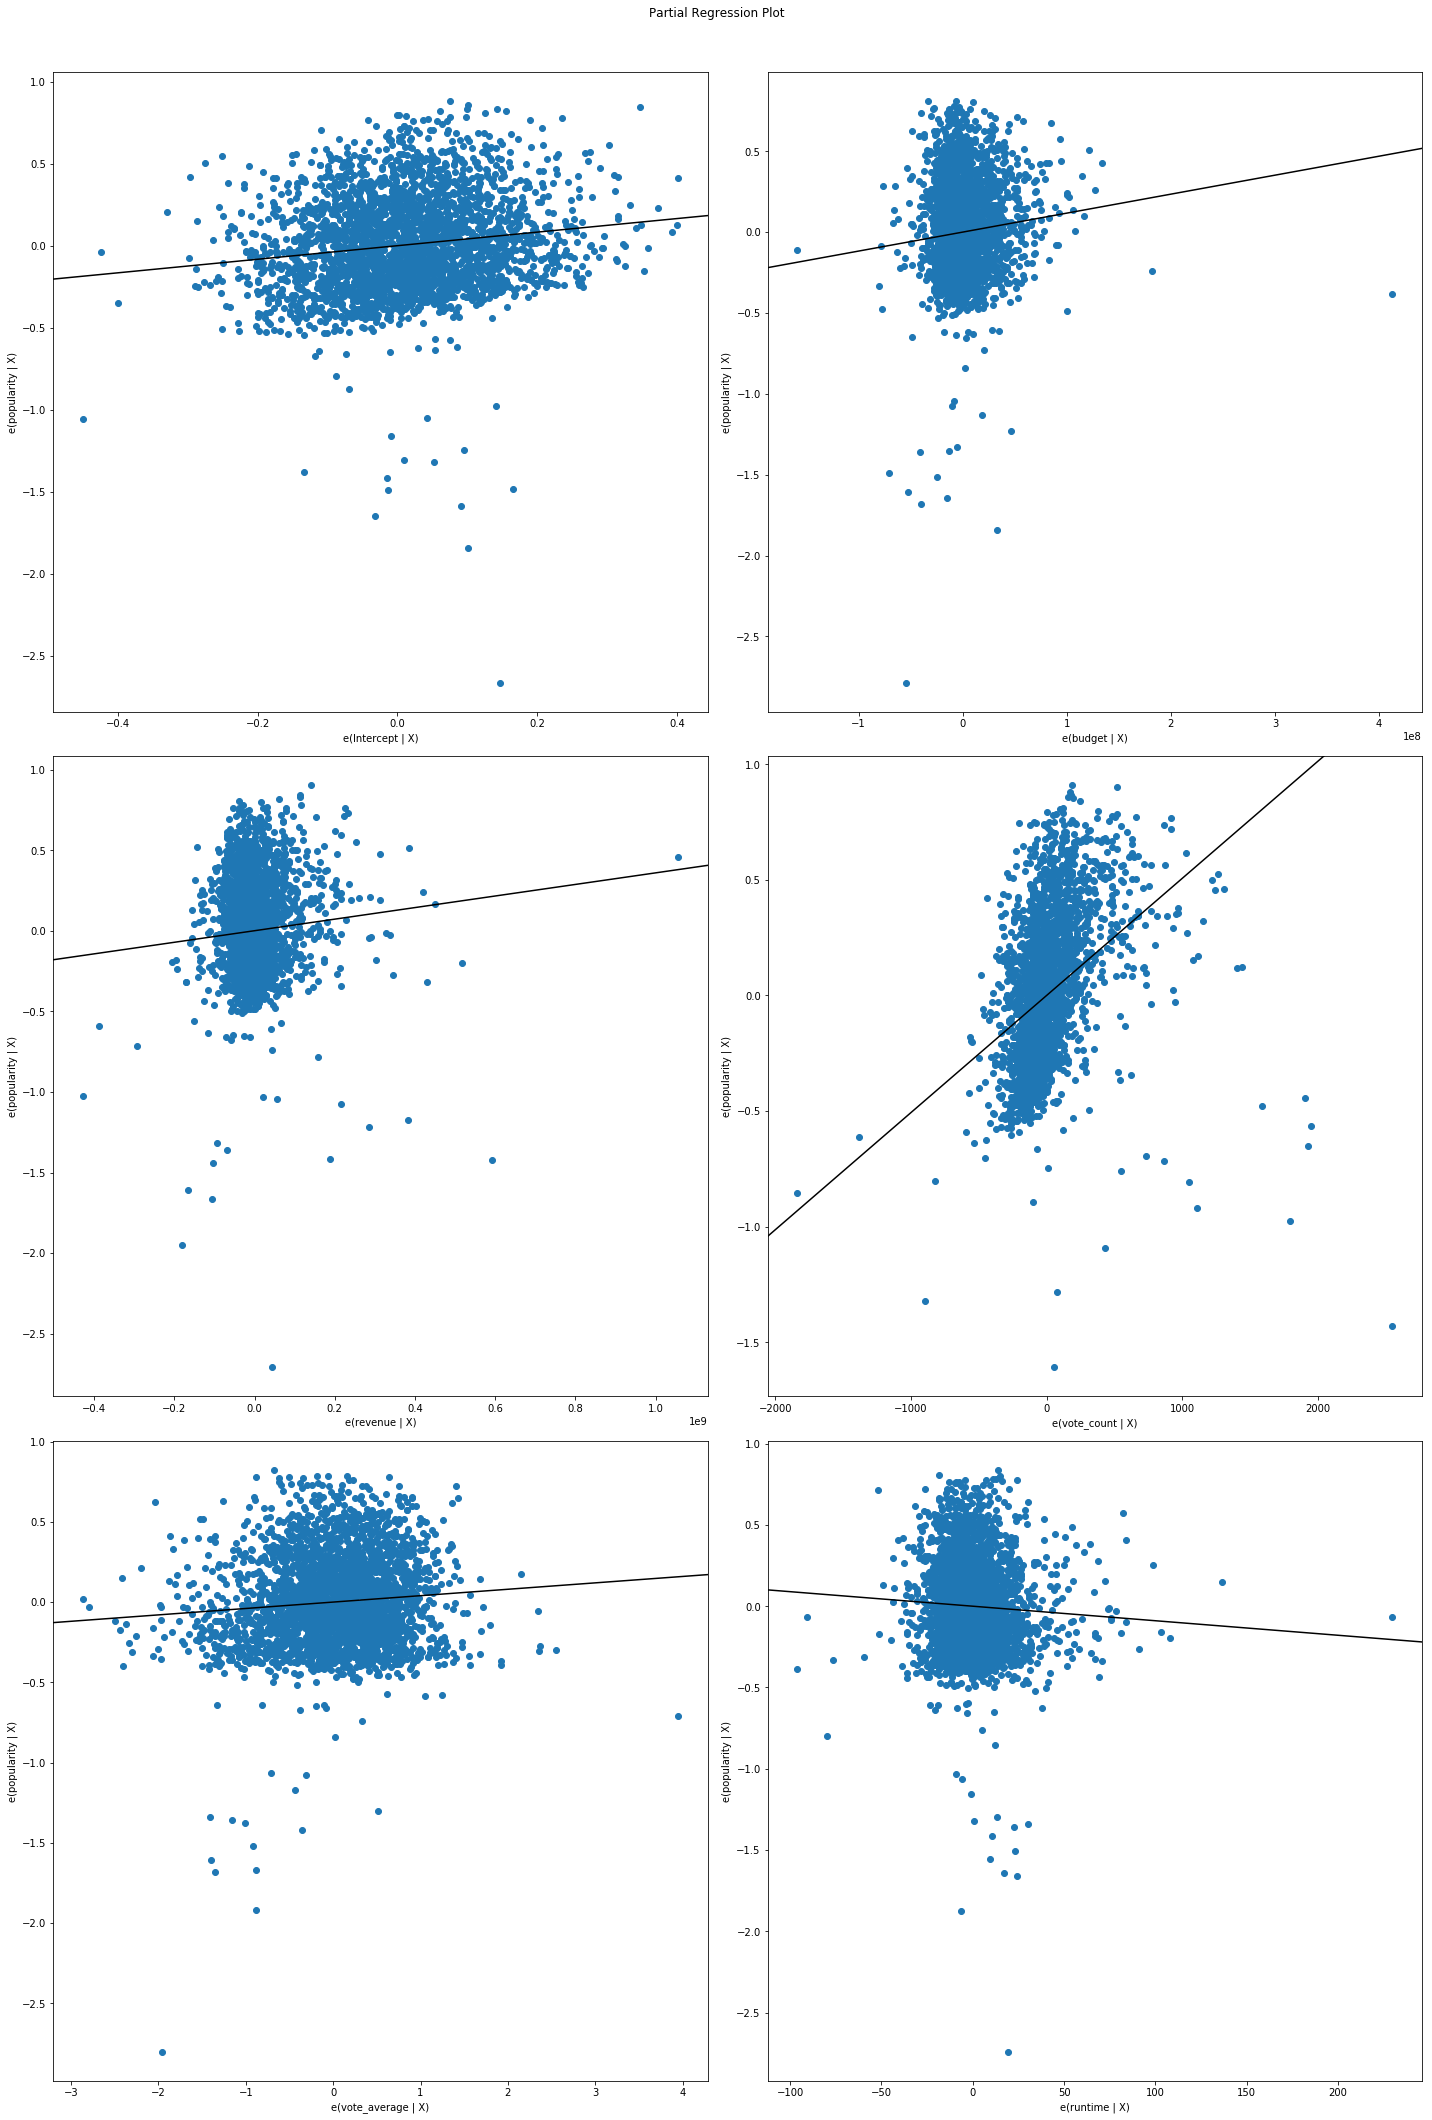

In [27]:
fig = plt.figure(figsize=(20,30))
fig = sm.graphics.plot_partregress_grid(movie_popularity, fig=fig)

>### Discussion 

>Based on the above linear regression table, we can say that all the independent variables - budget, revenue, vote_count, vote_average and runtime are significant at confidence level of 99%. 

>From the OLS Regression coefficients table and scatter plots, we can see that the coefficient for budget is 1.173e-09 USD (assuming the currency is in USD). The coefficient indicates that for every unit increase in budget we can expect popularity to increase by 1.173e-09. 
Similary - 
><br>For every unit increase in revenue we can expect popularity to increase by 3.588e-10.
><br>For every unit increase in vote_count, we can expect popularity to increase by 0.0005.	
><br>For every unit increase in vote_average, we can expect popularity to increase by 0.0399.
><br>For every unit increase in runtime, we can expect popularity to decrease by 0.0009.
><p>We can see that the R-square is 0.318, Hence we can say that there is fairly positive linear relationship between popularity and independent variables such as budget, revenue, vote_count, vote_average and runtime. 

<a id='conclusions'></a>
## Conclusions


### Limitations
One of the limitations found for TMDB movies dataset is the presence of outliers. In the analysis above, the outliers are removed for the variable popularity but outliers may still be present for the variables like revenue, budget etc. 

Another limitation is the use of linear regression for the dataset. The R-Square is 0.318, we could use another technique to improve R-Square like classification or clustering or we could consider adding more variables for linear regression.  

### Results
From the above analysis, it is observed that the 'Comedy' and 'Drama' were the two most common genre. From the p-value obtained from the t-test statistic, we can also say that the movies with genre 'Drama' are not more popular than movies with genre 'Comedy'. 

We also found that fairly positive linear relationship exists between popularity of the movie and revenue, budget, vote_count, vote_average and runtime of the movie. 

### Further analysis
For further analysis, plan is to answer questions like which genres are preferred by different production studio, what genres of movies are likely to enter million dollar profit etc.


## References
<br>
https://www.kaggle.com/diegoinacio/imdb-genre-based-analysis
<br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind_from_stats.html#scipy.stats.ttest_ind_from_stats
<br>
https://stackoverflow.com/